# Лабораторная работа № 1

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

## Датчики случайных величин

### Метод середины квадрата

In [2]:
def middle_square_generator(n, start=12345678, digits=8):
    assert int(math.log10(start) + 1) <= digits, f'Digits count of start({start}) is more than passed digits({digits})!'
    assert digits % 2 == 0, f'Digits({digits}) should be even!'
    
    right_shift = 10 ** (digits // 2)
    left_shift = 10 ** (digits + digits // 2)
    denominator = 10 ** digits
    
    while n:
        start = start ** 2 % left_shift // right_shift
        yield start / denominator
        n -= 1

### Мультипликативный конгруэнтный метод

In [3]:
def multiplicative_congruential_generator(n, start=12345678, k=87654321, m=10**16):
    while n:
        start = k * start % m
        yield start / m
        n -= 1

## Статистическое исследование датчиков

In [4]:
def generate_sequence(generator, n):
    return [value for value in generator(n)]


def plot_graphic_and_convergence(vector_x, vector_y, convergence, title, xlabel, ylabel):
    plt.plot(vector_x, vector_y)
    plt.axhline(convergence, color='red', linestyle="--")
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Тестирование равномерности

In [5]:
def histogram_estimation(generator, bins=20):
    seq = generate_sequence(generator, 10000)
    
    for n in range(100, 10000, 2000):
        a = plt.hist(seq[:n], bins)[0]
        plt.axhline(n / bins, color='red', linestyle="--")
        plt.grid()
        plt.title(f'Histogram N={n}, bins={bins}')
        plt.xlabel('Generate numbers interval')
        plt.ylabel('Count of generate numbers')
        plt.show()

    n_val, diff_sum = [], []
    for n in range(100, 10000, 100):
        hist_val = np.histogram(seq[:n], bins)[0]
        n_val.append(n)
        diff_sum.append(np.sum(np.fabs(np.subtract(np.divide(hist_val, n), 1 / bins))))
    plot_graphic_and_convergence(n_val, diff_sum, convergence=0,
                                 title='Histogram estimation', xlabel='Count of generate numbers',
                                 ylabel='Probability deviation(∑|p - 1/K|)')


def expected_value_estimation(generator):
    seq = generate_sequence(generator, 10000)
    
    n_val, exp_val = [], []
    for n in range(100, 10000, 100):
        n_val.append(n)
        exp_val.append(np.mean(seq[:n]))
    plot_graphic_and_convergence(n_val, exp_val, convergence=0.5,
                                 title='Expected value estimation', xlabel='Count of generate numbers',
                                 ylabel='Expected value(M[X])')
    plot_graphic_and_convergence(n_val, np.fabs(np.subtract(exp_val, 0.5)), convergence=0,
                                 title='Expected value estimation', xlabel='Count of generate numbers',
                                 ylabel='Expected value deviation(|M[X] - M|)')


def variance_estimation(generator):
    seq = generate_sequence(generator, 10000)
    
    n_val, variance = [], []
    for n in range(100, 10000, 100):
        n_val.append(n)
        variance.append(np.var(seq[:n]))
    plot_graphic_and_convergence(n_val, variance, convergence=0.08333,
                                 title='Variance estimation', xlabel='Count of generate numbers',
                                 ylabel='Variance(D[X])')
    plot_graphic_and_convergence(n_val, np.fabs(np.subtract(variance, 0.08333)), convergence=0,
                                 title='Variance estimation', xlabel='Count of generate numbers',
                                 ylabel='Variance deviation(|D[X] - D|)')

#### Тестирование метода середины квадрата

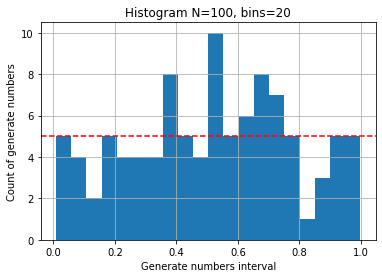

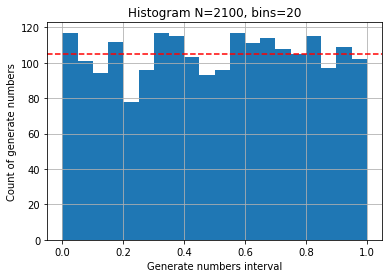

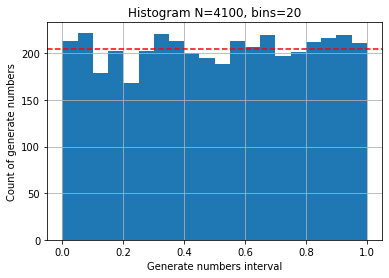

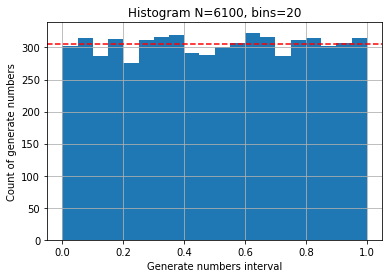

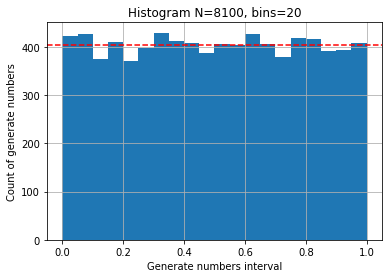

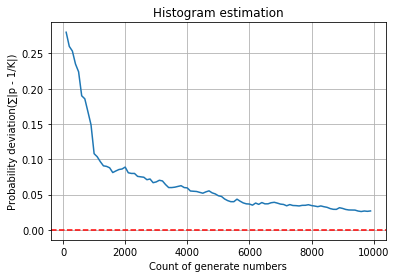

In [6]:
histogram_estimation(middle_square_generator)

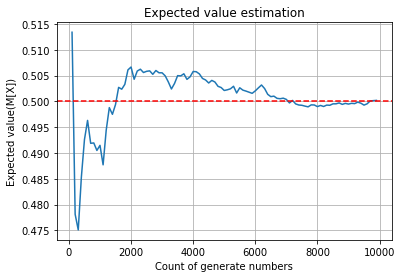

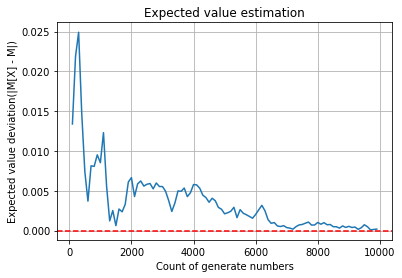

In [7]:
expected_value_estimation(middle_square_generator)

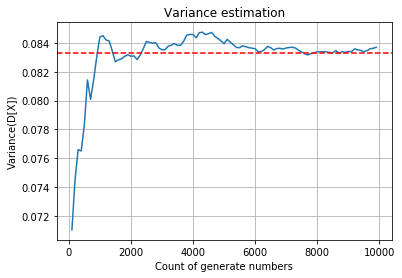

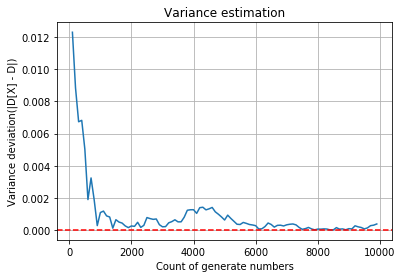

In [8]:
variance_estimation(middle_square_generator)

#### Тестирование мультипликативного конгруэнтного метода

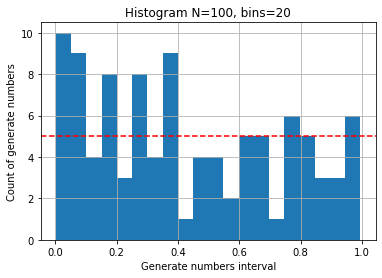

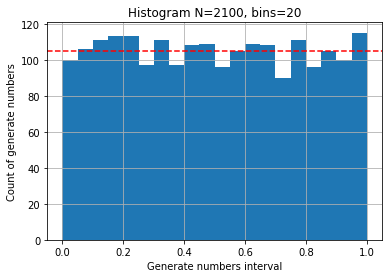

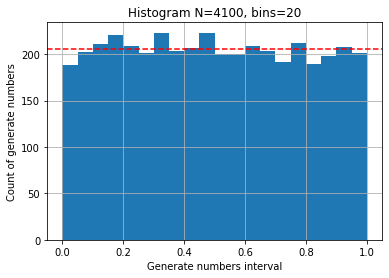

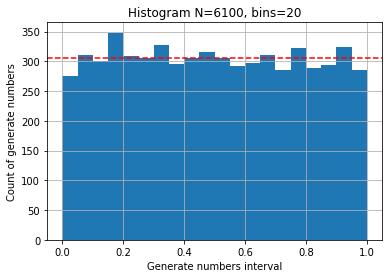

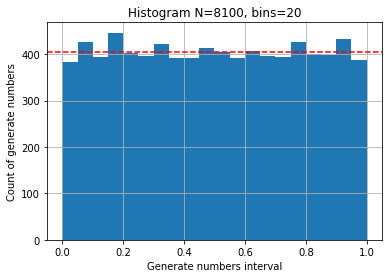

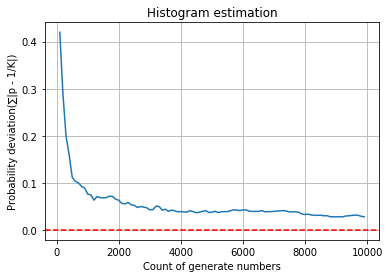

In [9]:
histogram_estimation(multiplicative_congruential_generator)

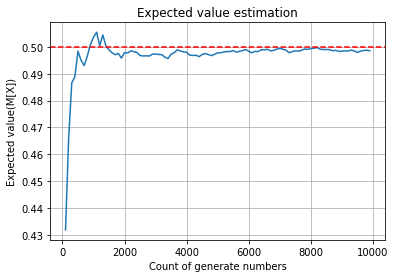

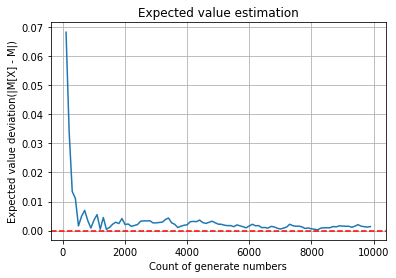

In [10]:
expected_value_estimation(multiplicative_congruential_generator)

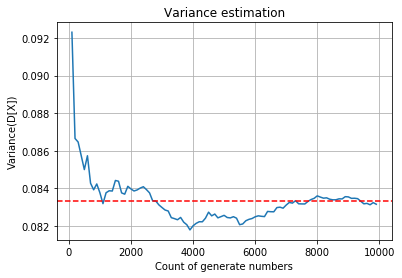

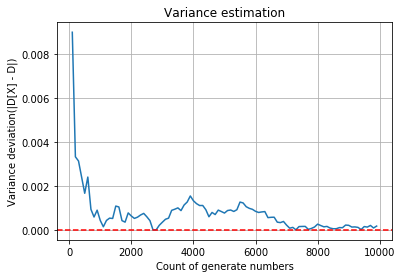

In [11]:
variance_estimation(multiplicative_congruential_generator)

### Тестирование независимости

In [12]:
def correlation_estimation(generator, shift=50):
    seq = generate_sequence(generator, 10000)
    
    n_val, correlation = [], []
    for n in range(100, 10000, 100):
        n_val.append(n)
        correlation.append(np.corrcoef(np.vstack((seq[:n-shift], seq[shift:n])))[0][1])
    plot_graphic_and_convergence(n_val, correlation, convergence=0,
                                 title=f'Correlation estimation with shift={shift}', xlabel='Count of generate numbers',
                                 ylabel=f'Correlation(R[X, X + {shift}])')

#### Тестирование метода середины квадрата

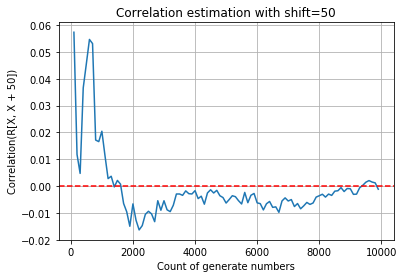

In [13]:
correlation_estimation(middle_square_generator)

#### Тестирование мультипликативного конгруэнтного метода

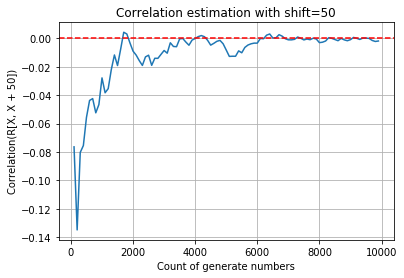

In [14]:
correlation_estimation(multiplicative_congruential_generator)